In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
#train['keyword'].value_counts()

In [5]:
#lower case
train['text']=train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
train['text']=train['text'].str.replace('\d', '')

In [7]:
import nltk
from nltk.corpus import stopwords

In [8]:
sw=stopwords.words("english")
sw.append("u")
sw.append("im")

In [9]:
#take out stopwords
train['text']=train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [10]:
from textblob import Word

In [11]:
train['text']

0           deeds reason #earthquake may allah forgive us
1                  forest fire near la ronge sask. canada
2       residents asked 'shelter place' notified offic...
3       , people receive #wildfires evacuation orders ...
4       got sent photo ruby #alaska smoke #wildfires p...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @thetawniest control wild fires c...
7610    m. [: utc]?km volcano hawaii. http://t.co/zdto...
7611    police investigating e-bike collided car littl...
7612    latest: homes razed northern california wildfi...
Name: text, Length: 7613, dtype: object

In [12]:
#Lemmatization. WordNetLemmatizer may be used instead
train['text']=train['text'].apply(lambda x: " ".join([Word(x).lemmatize() for x in x.split()]))

In [13]:
# More data cleaning in general
train["text"] = train["text"].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"")
train["text"] = train["text"].str.replace(r"We're", "We are")
train["text"] = train["text"].str.replace(r"That's", "That is")
train["text"] = train["text"].str.replace(r"won't", "will not")
train["text"] = train["text"].str.replace(r"they're", "they are")
train["text"] = train["text"].str.replace(r"Can't", "Cannot")
train["text"] = train["text"].str.replace(r"wasn't", "was not")
train["text"] = train["text"].str.replace(r"don\x89Ûªt", "do not")
train["text"] = train["text"].str.replace(r"aren't", "are not")
train["text"] = train["text"].str.replace(r"isn't", "is not")
train["text"] = train["text"].str.replace(r"You're", "You are")
train["text"] = train["text"].str.replace(r"I'M", "I am")
train["text"] = train["text"].str.replace(r"shouldn't", "should not")
train["text"] = train["text"].str.replace(r"wouldn't", "would not")
train["text"] = train["text"].str.replace(r"i'm", "I am")
train["text"] = train["text"].str.replace(r"We've", "We have")
train["text"] = train["text"].str.replace(r"Didn't", "Did not")
train["text"] = train["text"].str.replace(r"it's", "it is")
train["text"] = train["text"].str.replace(r"can't", "cannot")
train["text"] = train["text"].str.replace(r"don't", "do not")
train["text"] = train["text"].str.replace(r"you're", "you are")
train["text"] = train["text"].str.replace(r"I've", "I have")
train["text"] = train["text"].str.replace(r"Don't", "do not")
train["text"] = train["text"].str.replace(r"I'll", "I will")
train["text"] = train["text"].str.replace(r"Let's", "Let us")
train["text"] = train["text"].str.replace(r"Could've", "Could have")
train["text"] = train["text"].str.replace(r"youve", "you have")
train["text"] = train["text"].str.replace(r"It's", "It is")

In [15]:
train['text'][0:100]

0           deed reason #earthquake may allah forgive u
1                forest fire near la ronge sask. canada
2     resident asked 'shelter place' notified office...
3     , people receive #wildfires evacuation order c...
4     got sent photo ruby #alaska smoke #wildfires p...
                            ...                        
95    mile backup i- south...accident blocking right...
96    accident changed life? help determine option f...
97    #breaking: deadly motorcycle car accident happ...
98                         @flowri marinading accident?
99    car even week got fucking car accident .. mf c...
Name: text, Length: 100, dtype: object

In [16]:
freq=train['text'][0:1000].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [17]:
freq.columns=['words','tf']

In [46]:
freq

,words,tf
0,forgive,1.0
1,may,5.0
2,#earthquake,1.0
3,reason,9.0
4,deed,1.0
...,...,...
4274,score,1.0
4275,body's,1.0
4276,@editaxohaze,1.0
4277,cuffed,1.0


In [18]:
x=freq.sort_values(by='tf',ascending=False)[2:20]

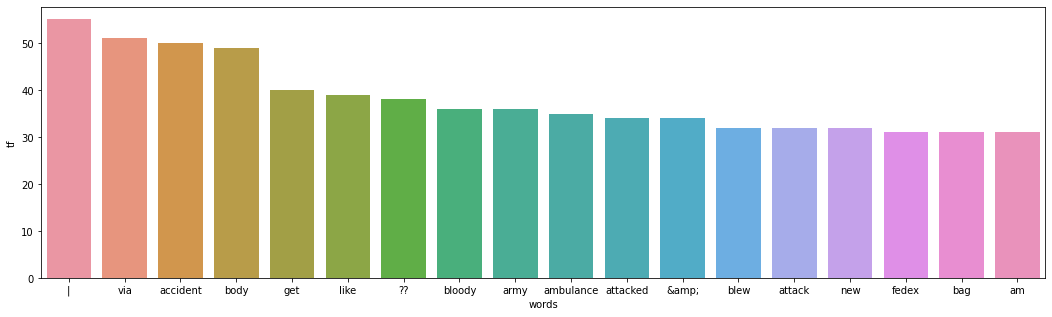

In [19]:
plt.figure(figsize=(18,5))
sns.barplot(x['words'],x['tf'])

In [20]:
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
#import gensim 
#from gensim.models import Word2Vec 

In [117]:
#from sklearn.cluster import KMeans

In [52]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(train['text'],train['target'],stratify=train['target'],random_state=42)
pd.DataFrame(X_train)

,text
5360,drake spoke rep raptors.beg differ night shot ...
1500,catastrophic-fallen-angel: reveillertm: macabr...
5086,though serious #natural #disaster increased #j...
3212,we're #hiring! click apply: rn ii/emergency se...
6706,love sound thunder rumbling across mountains.
...,...
2522,going redo nail watch behind scene desolation ...
2373,bbc news - india rail crash: train derail madh...
305,#pbban (temporary:) russaky @'armageddon | kil...
1648,petition | heartless owner whipped horse colla...


In [73]:
def lemmatize_tokenize(document):
    #lem=WordNetLemmatizer()
    stemmer = SnowballStemmer(language='english')
    token=word_tokenize(document)
    return [stemmer.stem(t) for t in token if t.isalpha()
                        and t.lower() not in sw]

In [74]:
tfidf=TfidfVectorizer(analyzer='word',tokenizer=lemmatize_tokenize)

In [75]:
pipeline_sgd=Pipeline(steps=[('tfidf',tfidf),('sgd',SGDClassifier() )])

#Workshop params
pipeline_params = {
    'sgd__loss': ['hinge', 'log'],
    'sgd__penalty': ['l1', 'l2', 'elasticnet'],
    'sgd__alpha': [.0001, .0005, .001]    
}
# Apparently my params don't work... maybe its the way the keys are spelled
#pipeline_params={
#    'sgd_loss': ['hinge','log'],
#    'sgd_penalty': ['l2','l1','elasticnet'],
#    'sgd_alpha': [0.0001,0.0005,0.001]
#    
#}

In [77]:
def fit_cross_validate_model(algo,params,X_train,X_test,y_train,y_test):
    gs=GridSearchCV(algo,params,scoring=['precision_macro','recall_macro','accuracy'],refit='precision_macro',n_jobs=4,verbose=10)
    gs.fit(X_train,y_train)
    print('best params: ',gs.best_params_)
    print('score on test set: ',gs.score(X_test,y_test))
    return( gs , gs.predict(X_test) )

In [78]:
gs_sgd , pred_sgd  =fit_cross_validate_model(pipeline_sgd,pipeline_params,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   25.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   36.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   56.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:  1.6min finished


best params:  {'sgd__alpha': 0.001, 'sgd__loss': 'hinge', 'sgd__penalty': 'l2'}
score on test set:  0.8203968253968255


In [80]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1086
           1       0.90      0.56      0.69       818

    accuracy                           0.78      1904
   macro avg       0.82      0.75      0.76      1904
weighted avg       0.81      0.78      0.77      1904

